In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report


In [44]:
df = pd.read_csv("../data/processed/marketing_campaign_processed.csv")

In [45]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Age,FamilySize,TotalSpending,TotalAcceptedCmp,CampaignSuccessRate,IsParent,CustomerTenure,Churn
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,0,1,68,2,1617,1,0.166667,0,663,0
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,0,0,71,4,27,0,0.000000,1,113,0
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,0,0,60,2,776,0,0.000000,0,312,0
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,0,0,41,3,53,0,0.000000,1,139,0
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,0,0,44,3,422,0,0.000000,1,161,1


In [46]:
# Hedef değişken
y = df['Churn']

# Özellikler (Churn hariç tüm kolonlar)
X = df.drop(columns=['Churn'])

X.shape, y.shape


((2240, 30), (2240,))

In [47]:
# Kategorik kolonları otomatik bulalım
cat_cols = X.select_dtypes(exclude=['number']).columns
cat_cols


Index(['Education', 'Marital_Status'], dtype='object')

In [48]:
education_order = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}


In [49]:
X['Education'] = X['Education'].map(education_order)


In [50]:
X["Education"].unique()

array([3, 5, 4, 1, 2])

In [51]:
X_encoded = pd.get_dummies(X, columns=['Marital_Status'], drop_first=True)


Education değişkeni ordinal (sıralı) bir değişkendir. 
Bu nedenle One-Hot yerine Ordinal Encoding uygulanmıştır:

Basic < 2n Cycle < Graduation < Master < PhD

Bu yaklaşım Logistic Regression, Random Forest ve XGBoost gibi algoritmaların 
daha iyi öğrenmesini sağlar.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1792, 36), (448, 36))

In [53]:
# Logistic Regression modeli oluştur
log_model = LogisticRegression(max_iter=2000)

# Modeli eğit (fit)
log_model.fit(X_train, y_train)


c:\Users\dilav\anaconda3\envs\churn-env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [54]:
# Test seti üzerinde tahmin yapalım
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]


In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5758928571428571
F1 Score: 0.10377358490566038
ROC-AUC: 0.5275109538254129

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.72       276
           1       0.28      0.06      0.10       172

    accuracy                           0.58       448
   macro avg       0.44      0.48      0.41       448
weighted avg       0.48      0.58      0.48       448



In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,       # Ağaç sayısı
    max_depth=None,        # Ağaç derinliği serbest
    random_state=42
)


In [57]:
rf_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [59]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.6428571428571429
F1 Score: 0.36507936507936506
ROC-AUC: 0.6315617627232895

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       276
           1       0.57      0.27      0.37       172

    accuracy                           0.64       448
   macro avg       0.62      0.57      0.56       448
weighted avg       0.63      0.64      0.60       448



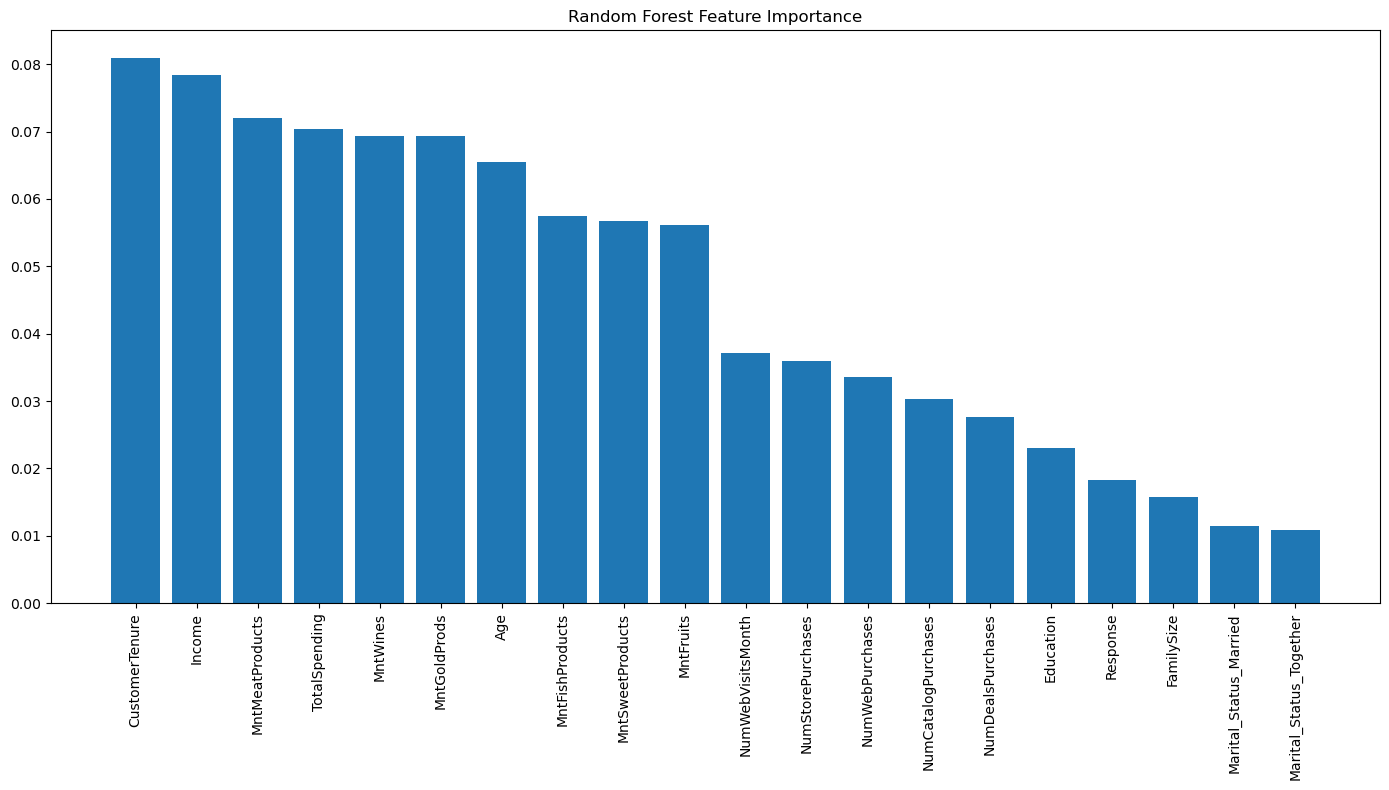

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Feature isimleri
feature_names = X_encoded.columns

# Grafik
plt.figure(figsize=(14, 8))
plt.title("Random Forest Feature Importance")
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), feature_names[indices][:20], rotation=90)
plt.tight_layout()
plt.show()
